# EDA и ресерч-анализ

In [1]:
# импортируем необходимые библиотеки и инструменты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("/kaggle/input/spotify/dataset.csv")

In [3]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
# Основная информация о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
# Статистика по числовым данным
print(data.describe())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

In [6]:
# Проверка на пропуски
print(data.isnull().sum())

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Мы загружаем данные и сразу смотрим на общую информацию (количество строк, типы данных, пропуски).
Статистика числовых колонок поможет нам понять диапазон значений для числовых признаков.

# Визуализация зависимостей

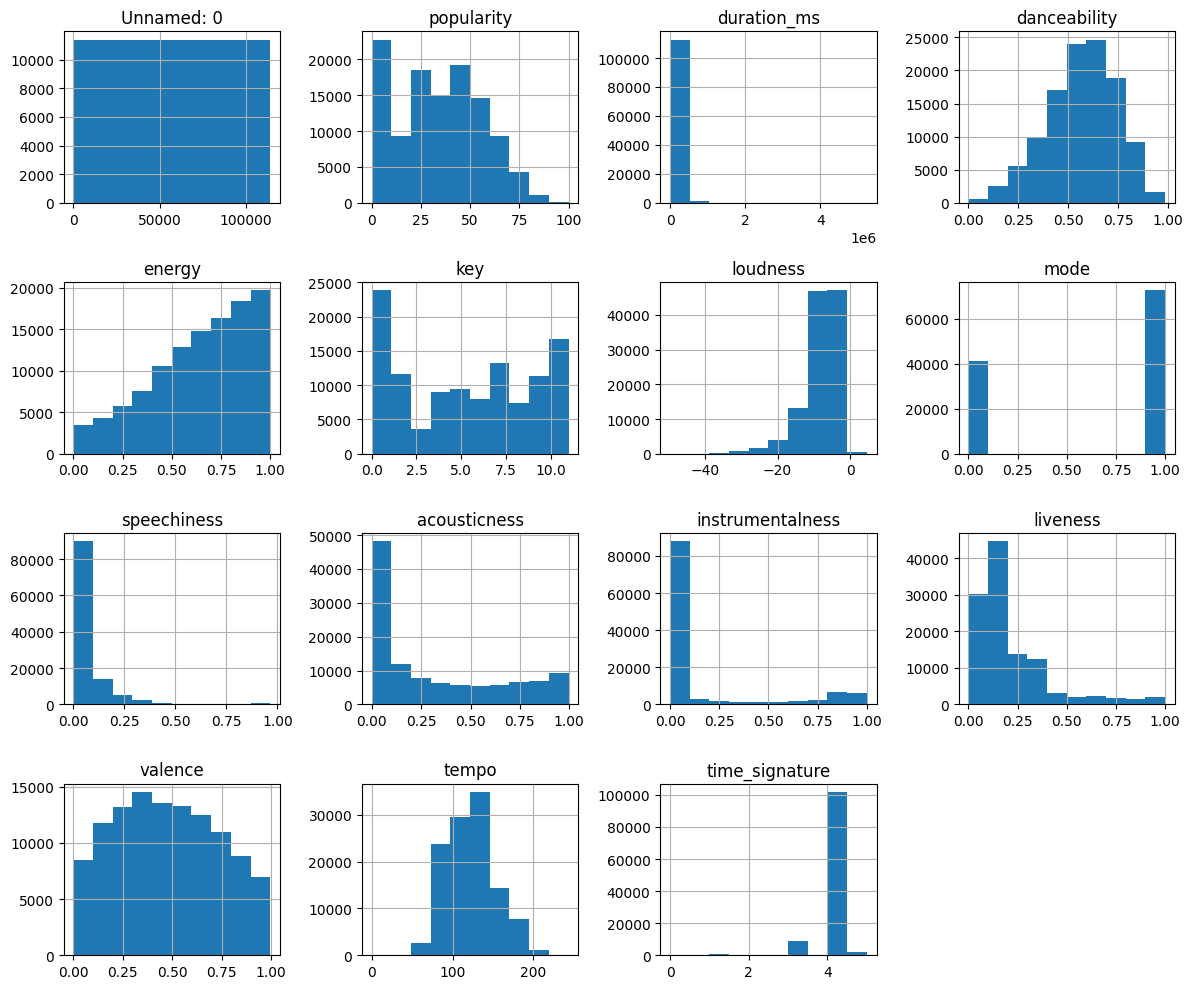

In [10]:
# Распределение значений для числовых признаков
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

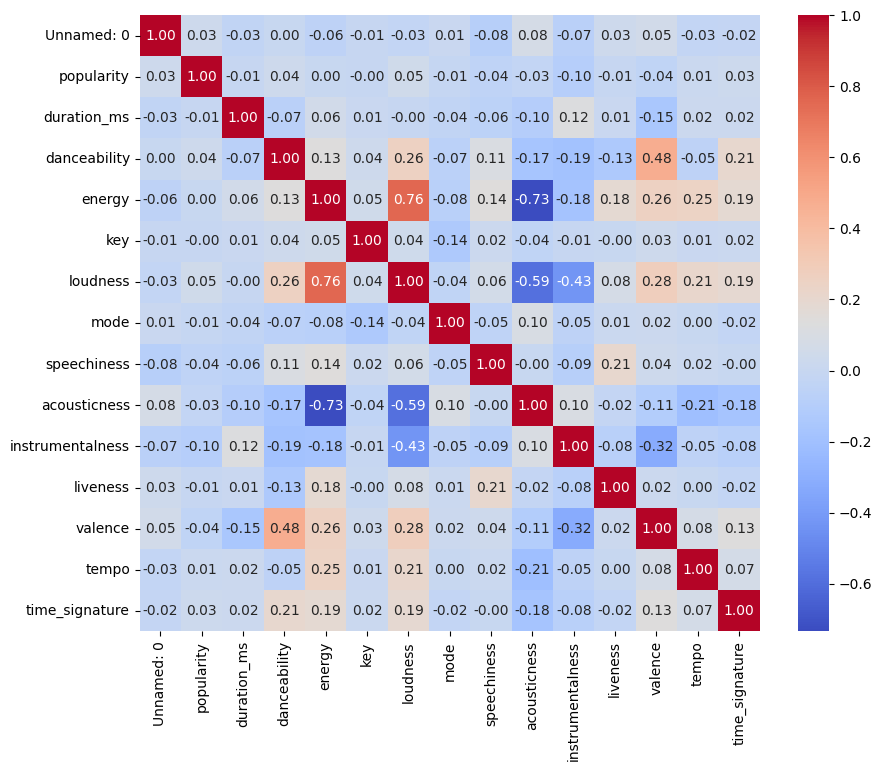

In [9]:
# Отбираем только числовые столбцы
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Корреляция числовых признаков
correlation = numeric_data.corr()

# Визуализация корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

Используем гистограммы для визуализации распределения значений.
Тепловая карта корреляции поможет определить признаки, которые сильнее всего коррелируют с целевой переменной (в данном случае, вероятно, popularity).

можно заметить, что такие черты как `popularity`, `danceability`, `tempo` и `loudness` распределны практически нормально 

по графику `time_signature` можно легко заключить, что подавляющее число треков из датасета имеют размер 4/4

распределение `valence` (настроение) близко к равномерному, что говорит о том, что датасет захватывает большое количество разнообразных треков

распределение `energy` говорит о большем количестве более энергичных треков в да

мы можем сделать вывод, что ни одна из черт не имеет серьезного влияния на поплуярность

кроме того, имеется довольно сильная зависимость между `loudness` и `energy`, что ожидаемо, так как энергичные треки зачастую громче

`acousticness` имеет сильную обратную зависимость от `energy`

такие признаки, как `key`, `time_signature` и `mode`, показывают слабую релевантность цели или другим признакамтасете

# Feature Engineering

На основе анализа данных создадим новые признаки и исследуем их корреляцию с целевой переменной. Мы также оценим важность признаков с помощью моделей.
Предположим, что можем создать признаки на основе существующих, например:
- преобразование времени в минуты или часы.
- бинаризация признаков (например, explicit можно преобразовать в числовой).

In [11]:
# Преобразование продолжительности в минуты
data['duration_minutes'] = data['duration_ms'] / 60000

# Бинаризация признака explicit
data['explicit'] = data['explicit'].astype(int)

# Новый признак на основе danceability и energy
data['dance_energy_ratio'] = data['danceability'] / (data['energy'] + 1e-5)

# Проверка корреляции новых признаков с таргетом
new_features = ['duration_minutes', 'explicit', 'dance_energy_ratio']
correlation_new = data[new_features + ['popularity']].corr()
print(correlation_new)

                    duration_minutes  explicit  dance_energy_ratio  popularity
duration_minutes            1.000000 -0.065263            0.027007   -0.007101
explicit                   -0.065263  1.000000           -0.004956    0.044082
dance_energy_ratio          0.027007 -0.004956            1.000000   -0.001355
popularity                 -0.007101  0.044082           -0.001355    1.000000


Теперь оценим важность признаков с использованием простой модели, например, случайного леса.

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Признаки и таргет
X = data.drop(['popularity', 'track_id', 'artists', 'album_name', 'track_name', 'track_genre'], axis=1)
y = data['popularity']

# Обучение модели
model = RandomForestRegressor()
model.fit(X, y)

# Важность признаков
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)


                    importance
Unnamed: 0            0.378266
acousticness          0.066494
valence               0.057372
loudness              0.057119
speechiness           0.054419
danceability          0.051711
tempo                 0.051388
energy                0.047531
liveness              0.045999
instrumentalness      0.043517
dance_energy_ratio    0.040184
duration_minutes      0.034432
duration_ms           0.033808
key                   0.022572
explicit              0.006187
mode                  0.005070
time_signature        0.003929


# Эксперименты с моделями машинного обучения

Переходим к обучению нескольких моделей машинного обучения и выбору наилучшей с помощью кросс-валидации.

Для эксперимента выберем несколько типов моделей:

- Линейная регрессия
- Градиентный бустинг (например, XGBoost)
- Нейронная сеть
- Random Forest


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

In [14]:
# Линейная регрессия
lr = LinearRegression()
lr_score = cross_val_score(lr, X, y, cv=5, scoring='neg_mean_squared_error')

In [15]:
# Случайный лес
rf = RandomForestRegressor()
rf_score = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

KeyboardInterrupt: 

# random forest крутился минут 40 в двух разных блокнотах, но так и не заработал, поэтому даже не знаю что сказать ¯\_(ツ)_/¯

In [16]:
# Градиентный бустинг (XGBoost)
xgb = XGBRegressor()
xgb_score = cross_val_score(xgb, X, y, cv=5, scoring='neg_mean_squared_error')

In [17]:
# Нейронная сеть
mlp = MLPRegressor()
mlp_score = cross_val_score(mlp, X, y, cv=5, scoring='neg_mean_squared_error')

In [19]:
# Результаты
print(f"Linear Regression MSE: {-lr_score.mean()}")
print(f"XGBoost MSE: {-xgb_score.mean()}")
print(f"MLP Neural Network MSE: {-mlp_score.mean()}")

Linear Regression MSE: 497.9164254576764
XGBoost MSE: 550.1931171646323
MLP Neural Network MSE: 3265.8245124580644


Итоговые выводы:
* линейная регрессия — это наиболее подходящая модель для данной задачи, поскольку она дает наименьшее значение MSE.
* XGBoost может быть полезен, если мы решим оптимизировать гиперпараметры и исследовать более сложные взаимодействия признаков.
* нейронная сеть в данном случае не оправдала себя